<a href="https://colab.research.google.com/github/Joseline7/ML-ataque-corazon/blob/main/Ataque_al_corazon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Machine learning**

**Tema:** Regresión logística para predecir enfermedades al corazón 


**Dataset:** Conjunto de datos de problemas relacionados con enfermedades al corazón

**link kaggle**: https://www.kaggle.com/code/nareshbhat/heart-attack-prediction-using-different-ml-models/notebook

# **Teoría del conocimiento**

**Regresión Logistica**

La regresión logística es una técnica estadística y de aprendizaje automático(ML) que clasifica los registros de un conjunto de datos en función de los valores de los campos de entrada. Predice una variable dependiente basada en uno o más conjuntos de variables independientes para predecir resultados.


**¿Cómo ayudaría la regresión logistica a predecir enfermedades del corazón?**
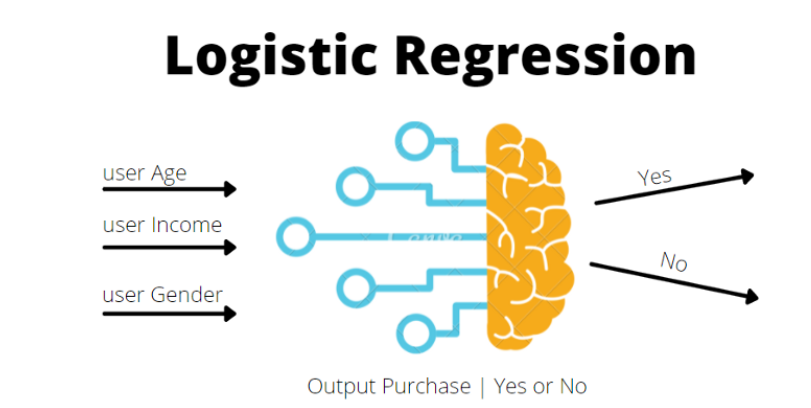




# **Información de cada atributo**


Age (edad en años)

Sex (M-masculino F-femenino)(1 = masculino; 0 = femenino)

CP (tipos de dolor de pecho)

TRESTBPS (presión en sangre en reposo (en mm Hg en hospitalización))

CHOL (suero del cholesterol en mg/dl)

FPS (Glucemia en ayunas > 120 mg/dl) (1 = verdadero; 0 = falso)

RESTECH (resultados electrocardiográficos en reposo)

THALACH (frecuencia cardíaca máxima alcanzada)

EXANG (angina inducida por el ejercicio (1 = si; 0 = no))

OLDPEAK (Depresión del ST inducida por el ejercicio en relación con el reposo)

SLOPE (la pendiente del segmento ST de ejercicio máximo)

CA (número de vasos principales (0-3) coloreados por fluoroscopia)

THAL (3 = normales; 6 = defecto fijo; 7 = defecto reversible)

CHD ( 10 años de riesgo de enfermedad coronaria CHD (Sí=1, No=0))

# **LIBRERIA**

In [ ]:
#loading dataset
import pandas as pd #contiene funciones para el analisis de datos
import numpy as np #realizar operaciones avanzadas

#visualisation
import matplotlib.pyplot as plt #creación de graficos de calidad
import seaborn as sns #grafico 

# data preprocessing
from sklearn.preprocessing import StandardScaler, LabelEncoder

# data splitting
from sklearn.model_selection import train_test_split

# data modeling
from sklearn.metrics import confusion_matrix,accuracy_score,roc_curve,classification_report
from sklearn.linear_model import LogisticRegression

 # creating & visualising confusion matrices
from sklearn.metrics import ConfusionMatrixDisplay
from collections import Counter

# **Importamos el dataset**

In [ ]:
df=pd.read_csv("/content/heart_disease_dataset.csv")
df.head( )

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,chd
0,52,M,0,125,212,0,1,168,0,1.0,2,2,3,no
1,53,M,0,140,203,1,0,155,1,3.1,0,0,3,no
2,70,M,0,145,174,0,1,125,1,2.6,0,0,3,no
3,61,M,0,148,203,0,1,161,0,0.0,2,1,3,no
4,62,F,0,138,294,1,1,106,0,1.9,1,3,2,no


# **Analisis de la data**

Tenemos 1025 entradas de datos con 14 atributos donde podemos observar que la caracteristica chd es un objeto de tipo categórico.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   object 
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  chd       1025 non-null   object 
dtypes: float64(1), int64(11), object(2)
memory usage: 112.2+ KB


Tenemos 1025 entradas de datos con 14 atributos cada uno.

In [ ]:
df.shape

(1025, 14)

Revisión de valores perdidos

In [ ]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
chd         0
dtype: int64

In [ ]:
df.isnull().values.any()

False

# **Categorico a numérico**
Tomamos el dato categorico para convertirlo en dato numérico.
Utilizamos "labelencoder" codifica etiquetas de una característica categórica en valores numéricos entre 0 y el número de clases menos 1.

In [ ]:
h = LabelEncoder()
y = h.fit_transform(df["chd"])
y2 = h.fit_transform(df["sex"])

Realiza el remplazo de los datos

In [ ]:
df.drop("chd", axis=1, inplace=True)
df.drop("sex", axis=1, inplace=True)

Se asigna:

   y para chd 

  y2 para sex

In [ ]:
(df["sex"]) = y2
(df["chd"]) = y

Revisamos en la tabla que se realizó el cambio

In [ ]:
df.head()

,age,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,sex,chd
0,52,0,125,212,0,1,168,0,1.0,2,2,3,1,0
1,53,0,140,203,1,0,155,1,3.1,0,0,3,1,0
2,70,0,145,174,0,1,125,1,2.6,0,0,3,1,0
3,61,0,148,203,0,1,161,0,0.0,2,1,3,1,0
4,62,0,138,294,1,1,106,0,1.9,1,3,2,0,0


# **EDA**
El **A**nálisis **E**xploratorio de **D**atos se usa para afinar y comprender las caracteristicas prioritarias de los atributos(columnas) y datos de entrada(filas). En el paso de la preparación de la data.


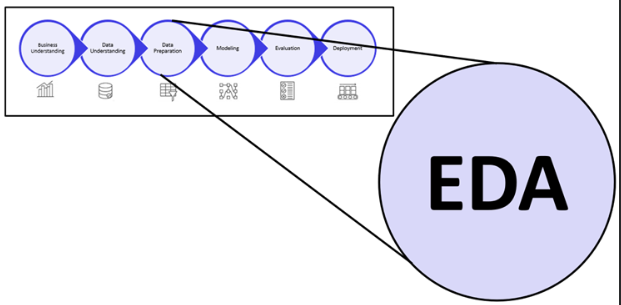

# **Interpretación**
Esto muestra la relación para(n, 2) combinación de variables en un DataFrame como una matriz de gráficos y los gráficos diagonales son los gráficos univariados.

Nos entrega la distribucion de las varianbles.

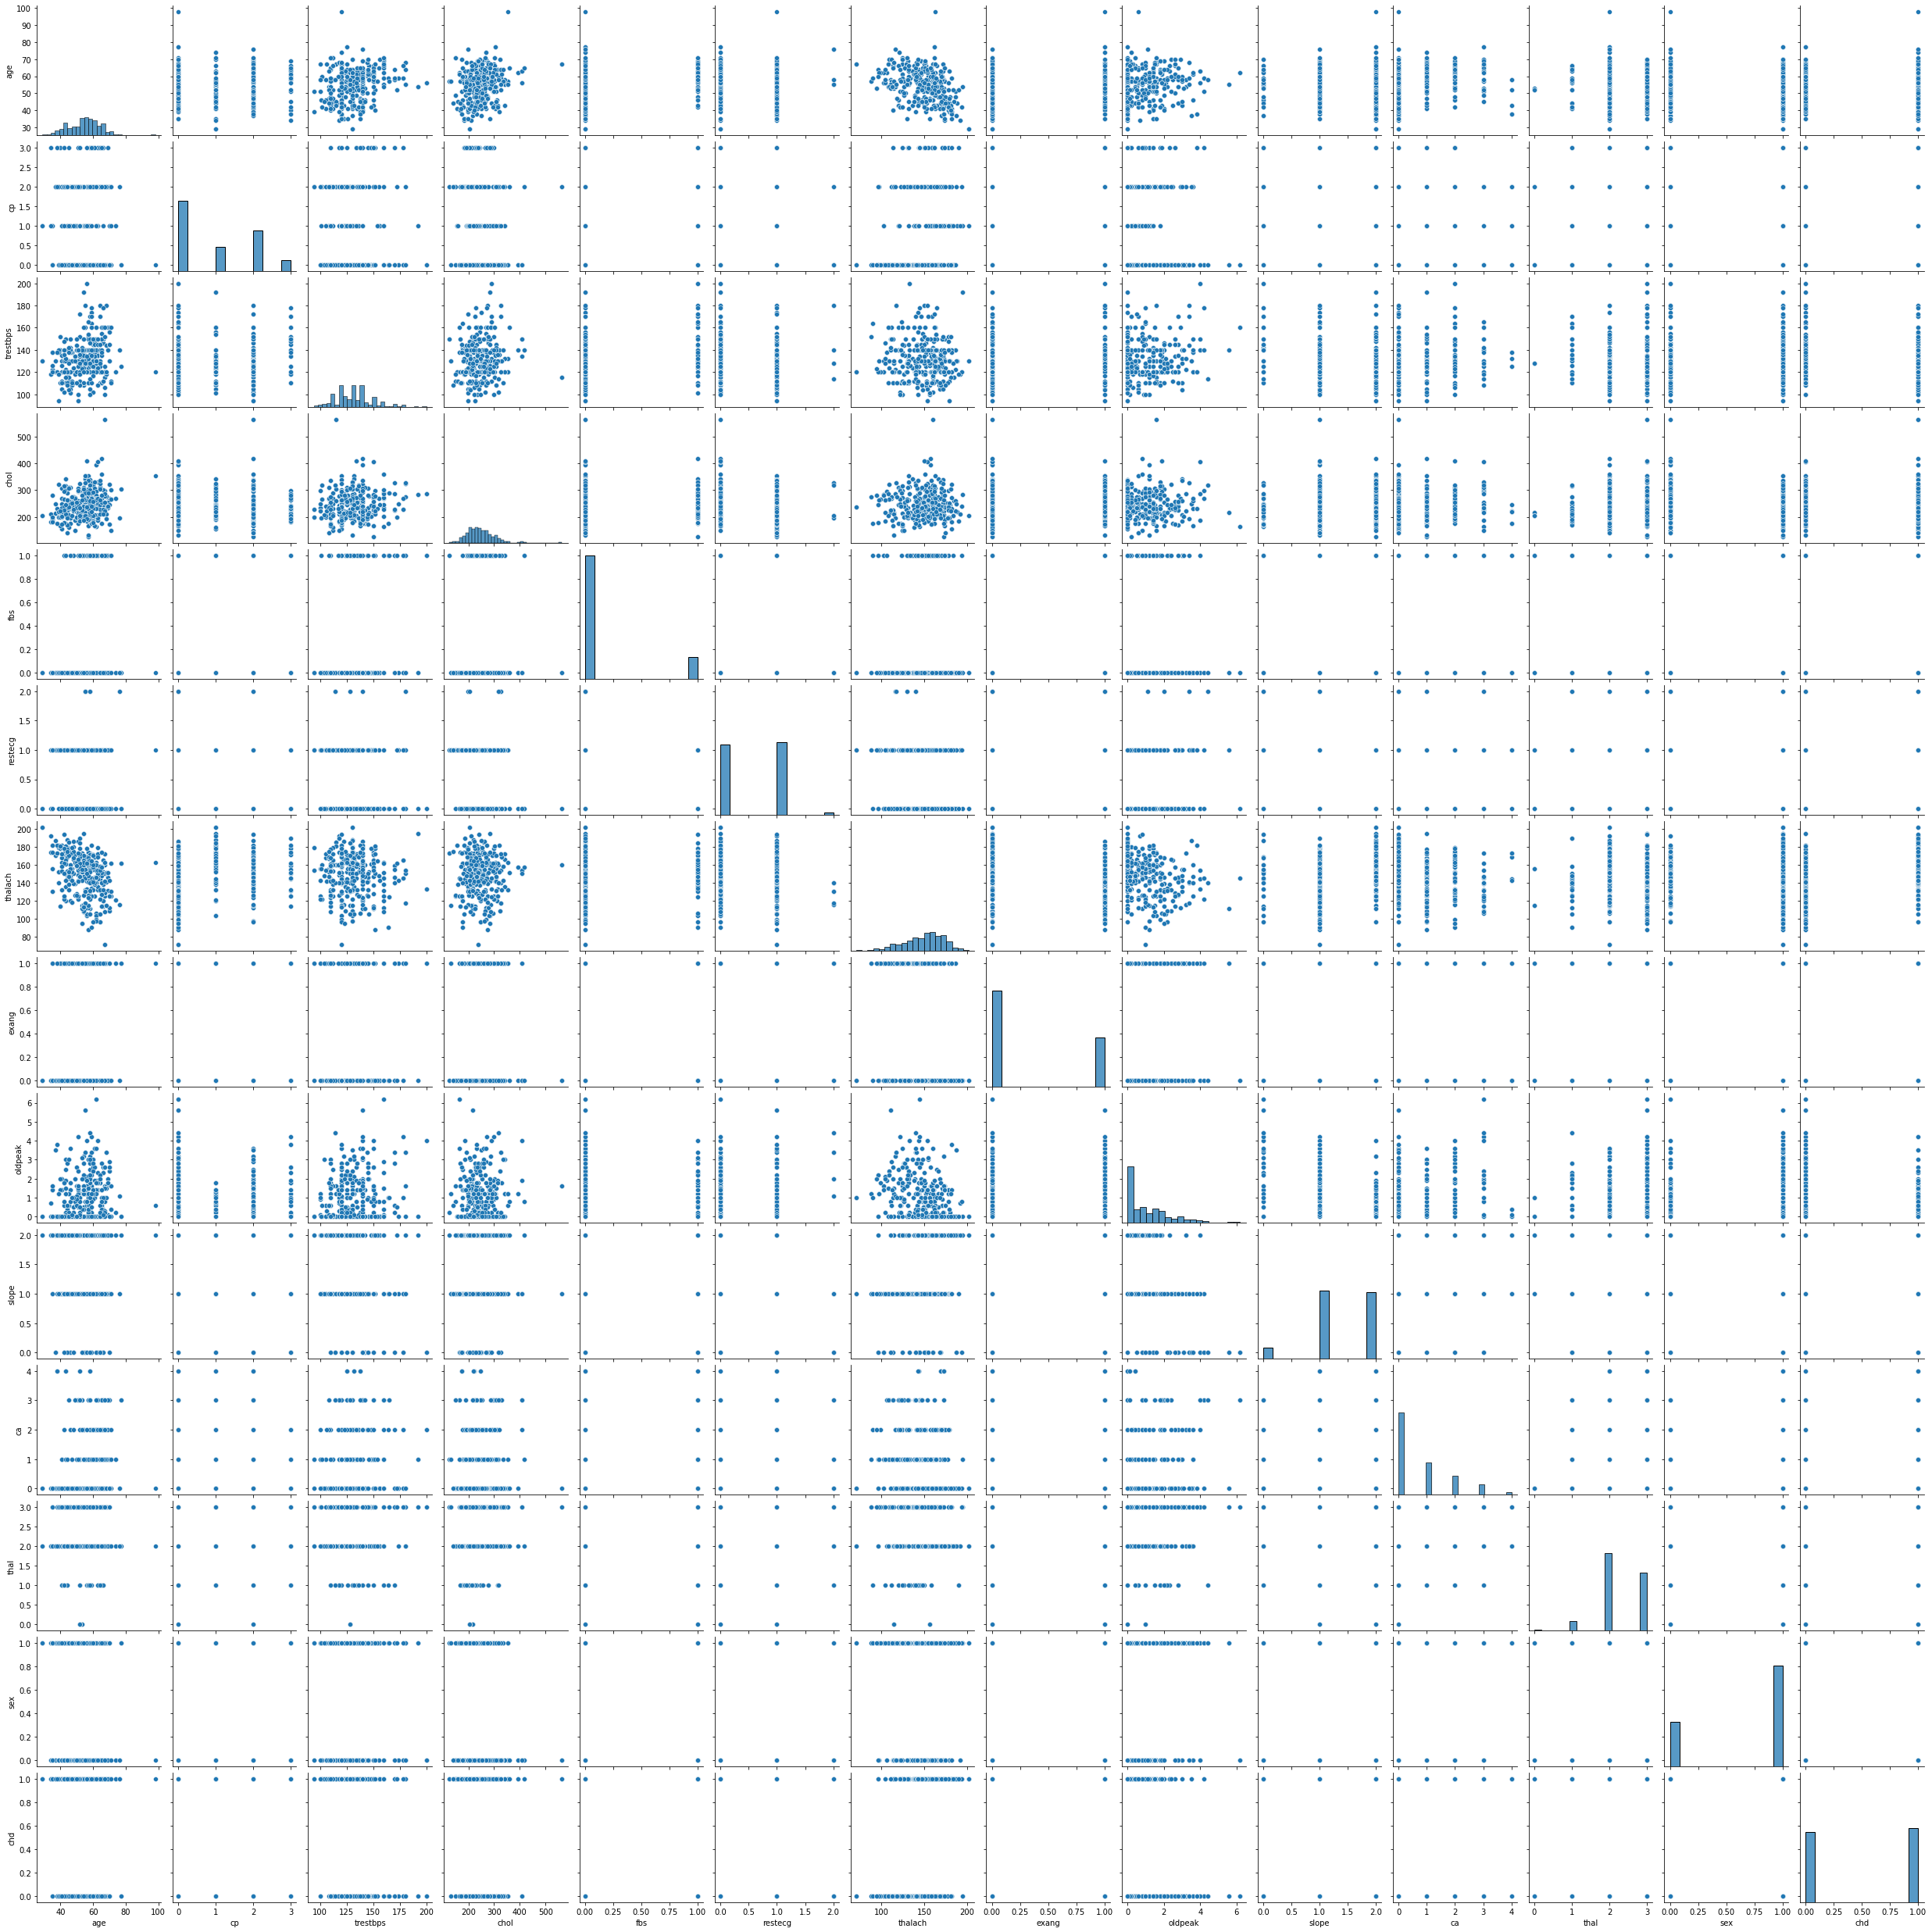

In [ ]:
sns.pairplot(df)

# **Interpretación de mapa de calor**

Cada cuadrado muestra la correlación entre las variables en cada eje. La correlación varía de 0.5 a +1. 

Los valores más cercanos a cero significan que no hay una tendencia lineal entre las dos variables. 

Cuanto más cercana a 1 es la correlación, más positivamente correlacionados están; es decir, a medida que uno aumenta, también lo hace el otro y cuanto más cerca de 1, más fuerte es esta relación. 

Una correlación más cercana a 0.5 es similar, pero en lugar de que ambas aumenten, una variable disminuirá a medida que aumenta la otra. 


Las diagonales son todas 1/anaranjado oscuro porque esos cuadrados correlacionan cada variable consigo misma (por lo que es una correlación perfecta). 

Por lo demás, cuanto mayor sea el número y más oscuro el color, mayor será la correlación entre las dos variables. La gráfica también es simétrica con respecto a la diagonal ya que las mismas dos variables se emparejan en esos cuadrados.

Text(0.5, 1.0, 'Regresión logística para predecir enfermedades al corazón')

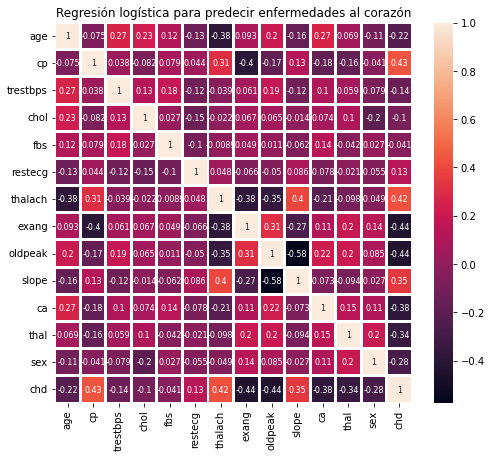

In [ ]:
fig, ax = plt.subplots(figsize=(8,7))
linewidths = 2
linecolor = 'white'
sns.heatmap(df.corr(), linewidths=linewidths, linecolor=linecolor, annot=True, annot_kws={"size":8})
plt.title("Regresión logística para predecir enfermedades al corazón")

Concluyendo que:

La variable independiente chd debería ser relacionada con los atributos: cp(), slope() y thalach().

Que si son analizadas desde el punto de vista médico esta caracteristicas se presentan a medida de que la edad avanza.

# **Diagrama de dispersión**

Se usa para identificar los diferentes subconjuntos.

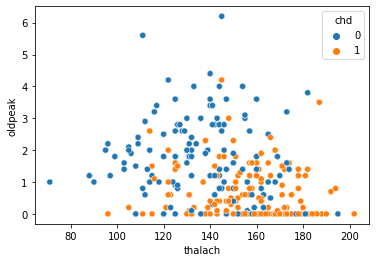

In [ ]:
sns.scatterplot(x = 'thalach', y = 'oldpeak', hue = 'chd', data=df)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


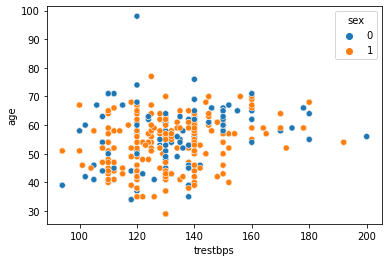

In [ ]:
sns.scatterplot(x = 'trestbps', y = 'age', hue = 'sex', data=df)

 **Trabla de descriptiva de Pandas** 

Regresa estadísticas descriptivas incluyendo: media, meadiana, máx, mín, std y conteos para una columna en particular de los datos. 

In [ ]:
dsc = df.describe()
dsc

,age,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,sex,chd
count,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.474146,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.695610,0.513171
std,9.173435,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.460373,0.500070
min,29.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000,0.000000
50%,56.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000,1.000000
75%,61.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000,1.000000
max,98.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000,1.000000


# **Interpretación en nuestros dataset con Outliers o Inlayers**

Datos diferentes que no se parecen: por ejemplo en este caso podemos observar en el atributo "age" el máximo es 98 años lo que nos lleva a analizar en nuestras gráficas y se puede observar que uno de los datos de entrada se encuentra dispersa.

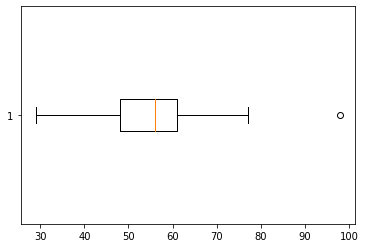

In [ ]:
plt.boxplot(df["age"], vert=False)
plt.show()

# **Distribución de las Variables**

Dado el dataset, podemos ordenar los datos de menor a mayor y dividirlos en cuatro partes con la misma cantidad de datos. Los cortes de estas divisiones son lo que llamamos cuartiles.

**Cuartiles**

Cuando dividimos algo en dos partes, hacemos un corte; cuando dividimos en tres partes, hacemos dos cortes. Es decir, que para dividir nuestra data en cuatro partes, necesitamos tres cuartiles, identificados como Q1, Q2 y Q3.

 **Rango intercuartílico**

La diferencia entre el Q3 y Q1 es lo que llamamos Rango intercuartílico y lo representamos con IQR por Inter-quartile range. Es una medida de dispersión de los datos, ya que representa el ancho del 50% central de los datos. Mientras más dispersos estén los datos, mayor será esta distancia.



In [ ]:
Q1 = df["age"].quantile(0.25) #por dejabo del 25% que se encuentran los datos
print("Primer Cuartil:", Q1) #extremo izquierdo de la gráfica

Q3 = df["age"].quantile(0.75) #por dejabo del 75% que se encuentran los datos
print("Tercer Cuartil:", Q3) #extremo derecho de la gráfica

IQR = Q3 - Q1
print("Rango intercuartil:", IQR) # determina los valores que son outliers

Mediana = df["age"].median() #linea roja de la caja
print("Mediana:", Mediana)

Valor_Minimo = df["age"].min()
print("Valor Minimo:", Valor_Minimo)

Valor_Máximo = df["age"].max()
print("Valor Máximo:", Valor_Máximo)

Primer Cuartil: 48.0
Tercer Cuartil: 61.0
Rango intercuartil: 13.0
Mediana: 56.0
Valor Minimo: 29
Valor Máximo: 98


Calculo de valores inferiores y superiores de la gráfica

In [ ]:
#bigote inferior
BI_Calculado = (Q1 - 1.5*IQR)
print("BI_Calculado:", BI_Calculado)
#bigote superior
BS_Calculado = (Q3 + 1.5*IQR)
print("BS_Calculado:", BS_Calculado)

BI_Calculado: 28.5
BS_Calculado: 80.5


Ubicación de outliers

In [ ]:
ubicacion_outliers = (df["age"]<=BI_Calculado) | (df["age"]>=BS_Calculado) #CONDICON = OR
print("Ubicación del Outliers:")
ubicacion_outliers.head(168)

Ubicación del Outliers:


0      False
1      False
2      False
3      False
4      False
       ...  
163    False
164    False
165    False
166    False
167     True
Name: age, Length: 168, dtype: bool

In [ ]:
outliers = df[ubicacion_outliers]
print("Lista de outliers: \n")
outliers.head()

Lista de outliers: 



,age,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,sex,chd
167,98,0,120,354,0,1,163,1,0.6,2,0,2,0,1


Lista sin outliers

In [ ]:
ubicacion_sin_out = (df["age"]>=BI_Calculado) & (df["age"]<=BS_Calculado) #CONDICON = and
df_2 = df[ubicacion_sin_out]
df_2

,age,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,sex,chd
0,52,0,125,212,0,1,168,0,1.0,2,2,3,1,0
1,53,0,140,203,1,0,155,1,3.1,0,0,3,1,0
2,70,0,145,174,0,1,125,1,2.6,0,0,3,1,0
3,61,0,148,203,0,1,161,0,0.0,2,1,3,1,0
4,62,0,138,294,1,1,106,0,1.9,1,3,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,140,221,0,1,164,1,0.0,2,0,2,1,1
1021,60,0,125,258,0,0,141,1,2.8,1,1,3,1,0
1022,47,0,110,275,0,0,118,1,1.0,1,1,2,1,0
1023,50,0,110,254,0,0,159,0,0.0,2,0,2,0,1


Grafica de verificación sin outliers

In [ ]:
print("New Shape: ", df_2.shape)

New Shape:  (1024, 14)


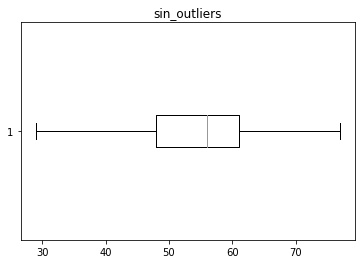

In [ ]:
plt.title("sin_outliers")
plt.boxplot(df_2["age"], vert=False)
plt.show()

# **Preparación del Modelo**



Realizamos la división de los datos y lo normalizamos dandole un 20% de datos para test.

In [ ]:
y = df_2["chd"]
X = df_2.drop('chd',axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state = 0)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Verificamos que CHD sea 1 = si ,  0 = no además del conteo que le corresponde a cada uno dado como total el número de entradas del 20%: 819

CHD ( 10 años de riesgo de enfermedad coronaria CHD (Sí=1, No=0))



In [ ]:
print(y_test.unique())
Counter(y_train)

[0 1]


Counter({1: 426, 0: 393})

Para la regresión logística se entrena el modelo y se realiza la predicción.
 Donde sacamos como resultados comparables de: exactitud, corrección de error y presición.

# **Matriz de confusión **


Es la que nos permite analizar los resultados de cómo trabaja un algoritmo de aprendizaje supervisado, es decir, permite medir cómo de bueno es un modelo de clasificación construido sobre un sistema de aprendizaje automático.

En el caso de las métricas: Son un conjunto de ideas en virtud de las cuales pueden extraerse las conclusiones relevantes de los resultados arrojados por una matriz.

**La exactitud**

Métrica fundamental, viene a señalar la cercanía entre los datos arrojados por la matriz y los datos reales. Cuanta mayor es la coincidencia, mayor es la exactitud y, por lo tanto, la matriz puede interpretarse como lo suficientemente exacta.

**La precisión**

Consiste en la proporción de número de predicciones correctas con el total de prediccione. Es decir, toma la exactitud de los datos correctos y la compara con el total de datos arrojados (sean estos exactos o no). Tal y como ocurría con la métrica anterior, cuanto mayor es la precisión más fielmente puede interpretarse la matriz.

**Recall**

La métrica de exhaustividad(recall) nos va a informar sobre la cantidad que el modelo de machine learning es capaz de identificar.

**F1**

El valor F1 se utiliza para combinar las medidas de precision y recall en un sólo valor. Esto es práctico porque hace más fácil el poder comparar el rendimiento combinado de la precisión y la exhaustividad entre varias soluciones

confussion matrix
[[87 19]
 [ 9 90]]


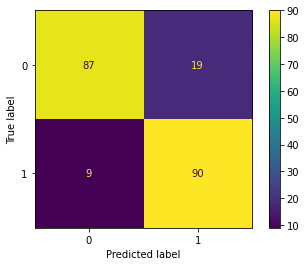

accuracy = 86.34146341463415,
recall = 90.9090909090909,
precision = 82.56880733944955,
f1-score = 86.53846153846153


In [ ]:
lr = LogisticRegression()
model = lr.fit(X_train, y_train)
lr_predict = lr.predict(X_test)

lr_conf_matrix = confusion_matrix(y_test, lr_predict)
lr_acc_score = accuracy_score(y_test, lr_predict)
cm_displ = ConfusionMatrixDisplay(lr_conf_matrix)
print("confussion matrix")
print(lr_conf_matrix)
cm_displ.plot()
plt.show()

#  calculate accuracy:
accuracy = np.mean(lr_predict==y_test)

#  calculate recall:
recall = lr_conf_matrix[1, 1]/lr_conf_matrix[1, :].sum() # del total de positivos reales, cuántos se clasificaron correctamente

#  calculate precision:
precision = lr_conf_matrix[1, 1]/lr_conf_matrix[:, 1].sum() # Si todos predijeron positivos, ¿cuánto eran verdaderos positivos

# compering
f1 = 2 * ((recall * precision)/(recall + precision)) #  combinamos la presición con recall 

print(f"accuracy = {accuracy*100},\nrecall = {recall*100},\nprecision = {precision*100},\nf1-score = {f1*100}")